In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline
import pprint
import pickle
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-prediction-dataset/placementdata.csv


In this project we are implementing logistic regression from scratch i.e. without using sklearn library. First we load data sets into pandas dataframe

In [68]:
myplacement_data=pd.read_csv('/kaggle/input/placement-prediction-dataset/placementdata.csv')
myplacement_data

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


# Exploratory Data Analysis(EDA)

Now we are analysing the given data by plotting different graphs.

In [69]:
myplacement_data.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
CGPA,10000.0,7.69801,0.640131,6.5,7.40,7.7,8.20,9.1
Internships,10000.0,1.04920,0.665901,0.0,1.00,1.0,1.00,2.0
Projects,10000.0,2.02660,0.867968,0.0,1.00,2.0,3.00,3.0
Workshops/Certifications,10000.0,1.01320,0.904272,0.0,0.00,1.0,2.00,3.0
AptitudeTestScore,10000.0,79.44990,8.159997,60.0,73.00,80.0,87.00,90.0
SoftSkillsRating,10000.0,4.32396,0.411622,3.0,4.00,4.4,4.70,4.8
SSC_Marks,10000.0,69.15940,10.430459,55.0,59.00,70.0,78.00,90.0
HSC_Marks,10000.0,74.50150,8.919527,57.0,67.00,73.0,83.00,88.0


In [70]:
myplacement_data.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



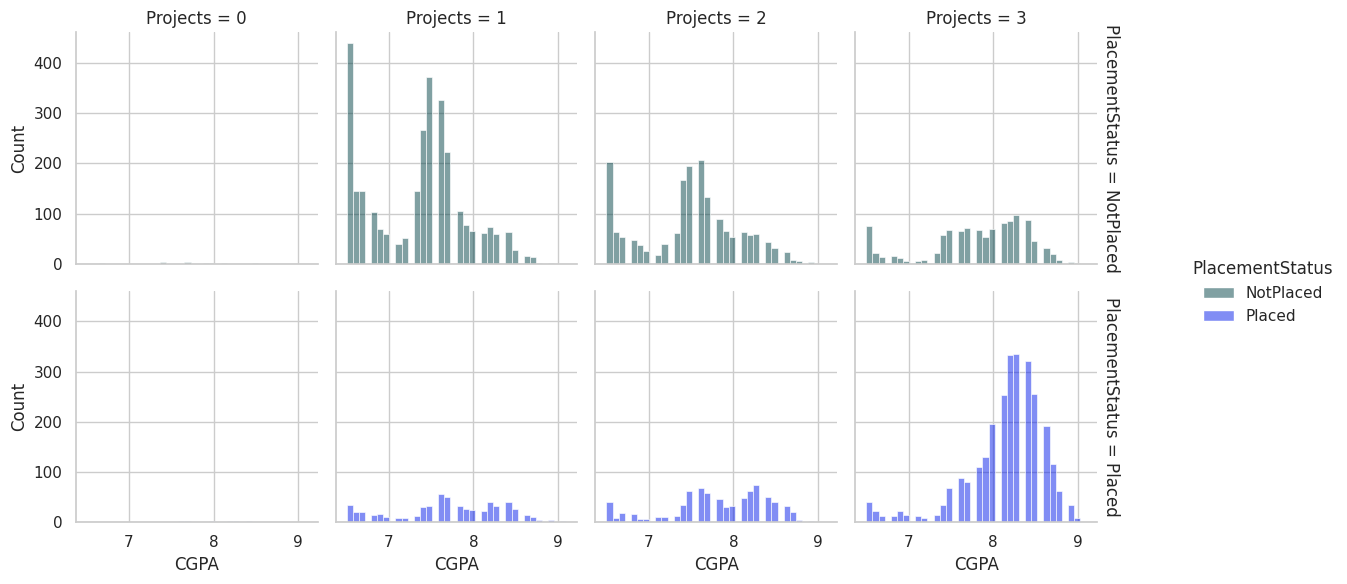

In [71]:
mypalette=['#034247','#051ceb']
sns.displot(
    myplacement_data, x="CGPA", col="Projects", row="PlacementStatus",
     height=3, facet_kws=dict(margin_titles=True),hue="PlacementStatus",palette=mypalette
)

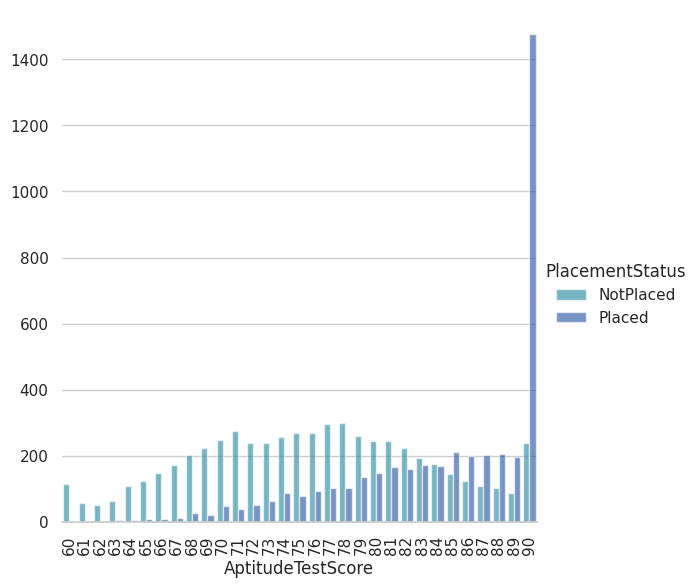

In [72]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=myplacement_data, kind="count",
    x="AptitudeTestScore",hue="PlacementStatus",
    palette=['#0792b5','#0747b5'], alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("AptitudeTestScore", "");
g.set_xticklabels(rotation=90)

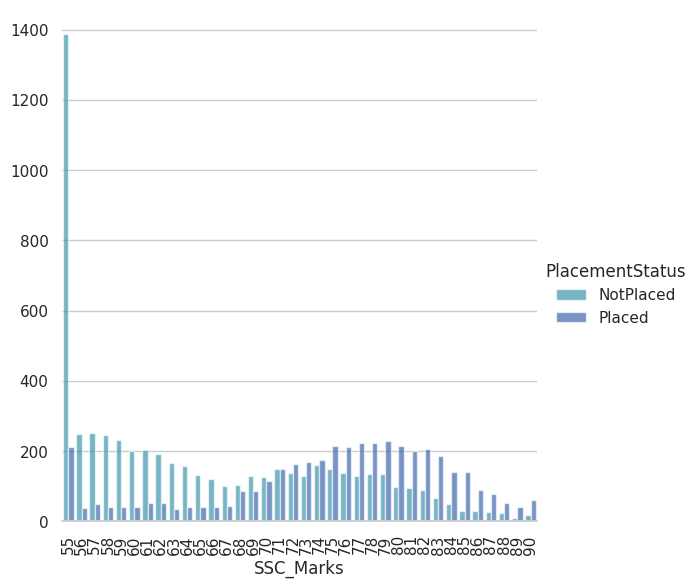

In [73]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=myplacement_data, kind="count",
    x="SSC_Marks",hue="PlacementStatus",
    palette=['#0792b5','#0747b5'], alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("SSC_Marks", "")
g.set_xticklabels(rotation=90)

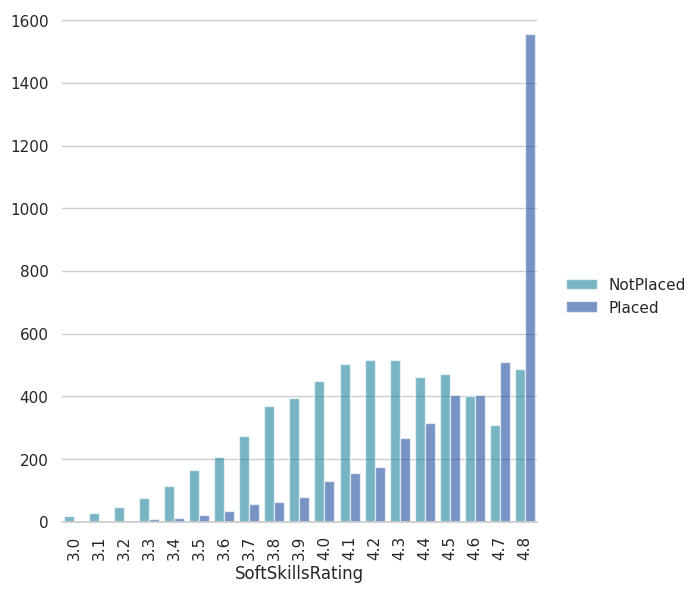

In [74]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=myplacement_data, kind="count",
    x="SoftSkillsRating",hue="PlacementStatus",
    palette=['#0792b5','#0747b5'], alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("SoftSkillsRating", "")
g.legend.set_title("")
g.set_xticklabels(rotation=90)

# Data Preprocessing

Here we encode the categorical data columns into 0s and 1s so that we can use those columns in correlation matrix as we cannot use categorical data in correlation matrix.

In [75]:
placement_data=myplacement_data.copy()
placement_data['ExtracurricularActivities'] = (placement_data['ExtracurricularActivities'] == 'Yes').astype(int)
placement_data['PlacementTraining'] = (placement_data['PlacementTraining'] == 'Yes').astype(int)
placement_data['PlacementStatus'] = (placement_data['PlacementStatus'] == 'Placed').astype(int)

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



<Axes: >

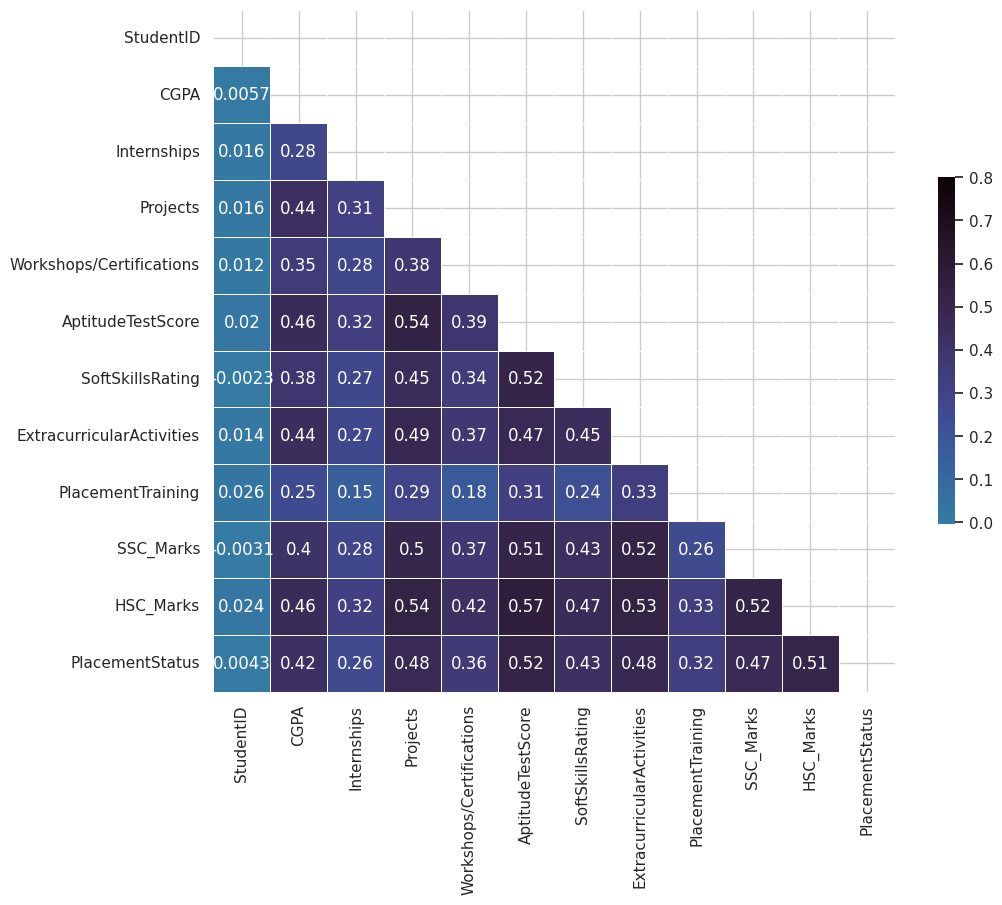

In [76]:
corr=placement_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='mako_r', vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

In [77]:
corr

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,1.000000,0.005724,0.015655,0.015924,0.011872,0.020314,-0.002269,0.013683,0.026297,-0.003082,0.024115,0.004294
CGPA,0.005724,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.444130,0.251628,0.404971,0.462313,0.423131
Internships,0.015655,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.274960,0.153547,0.279837,0.317149,0.260340
Projects,0.015924,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.491430,0.293709,0.499421,0.535708,0.475186
Workshops/Certifications,0.011872,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373926,0.180333,0.373045,0.418442,0.362268
AptitudeTestScore,0.020314,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.474130,0.314772,0.513044,0.565105,0.521744
SoftSkillsRating,-0.002269,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.448049,0.235571,0.430734,0.466912,0.427284
ExtracurricularActivities,0.013683,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,1.000000,0.327158,0.517850,0.533572,0.482491
PlacementTraining,0.026297,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.327158,1.000000,0.257440,0.325434,0.323659
SSC_Marks,-0.003082,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,0.517850,0.257440,1.000000,0.524916,0.469763


In [78]:
# Get the absolute value of correlation of all columns with PlacementStatus
target=abs(corr['PlacementStatus'])
# Get highly correlated columns (threshold value=0.3)
target = target[target>0.3]
# Make a list of names of all columns that are highly correlated
names=[index for index,value in target.items()]
# Remove the target variable from this
names.remove('PlacementStatus')
print(names)

['CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks']


In [79]:
# Lets define X and y, X has all highly correlated columns and y is target variable
X = placement_data[names].values
y = placement_data['PlacementStatus'].values

In [80]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples 
    n_samples = X.shape[0]
    # Set the seed for the random number genrator
    np.random.seed(random_state)
    # Shuffle the indices 
    shuffled_indices = np.random.permutation(np.arange(n_samples))
    # Determine the size of test set
    test_size = int(n_samples * test_size)
    # Splitting into test and train indices
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    # Splitting into target variables and features into test and train 
    X_train,X_test = X[train_indices],X[test_indices]
    y_train,y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Standardize the data
Standardization is a preprocessing technique used in machine learning to rescale and transform the features (variables) of a dataset to have a mean of 0 and a standard deviation of 1. It is also known as "z-score normalization" or "z-score scaling."

# How to Standardize Data
The standardization process involves the following steps:

Calculate the mean (
μ
) and standard deviation (
σ
) for each feature in the dataset.
For each data point (sample), subtract the mean (
μ
) of the feature and then divide by the standard deviation (
σ
) of the feature.
Mathematically, the standardized value for a feature x in a dataset is calculated as:

Standardized value = $\frac{x-\mu}{\sigma}$

Here, x is the original value of the feature, 
μ
 is the mean of the feature, and 
σ
 is the standard deviation of the feature.

In [82]:
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
        X_test (numpy.ndarray): Testing data.

    Returns:
        Tuple of standardized training and testing data.
    """
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Standardize the data
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)

# Model implementation

## Logistic Regression

Logistic Regression is used to solve classification problems binary as well as multiclass classification. We use sigmoid function in this model to squash the line at 0 and 1.
The following function represents the model :
$$f_{w,b}(x)=g(w.x+b)$$
In this equation,$f_{w,b}(x)$ represents the predicted probability, w is the weight vector, b is the bias term, x is the input feature vector, and is the sigmoid function:
$$g(z)=\frac{1}{1+e^{-z}}$$
To train a logistic regression model, we aim to find the best values for the parameters (w,b)that best fit our dataset and provide accurate class probabilities.

## Forward Pass
The forward pass computes the linear combination of input features  x with the weight vector  w and the bias term  b and then applies the sigmoid function to the result:
$$z=w.x+b$$
$$A=σ(z)A=\sigma(z)$$
## Cost Function
The cost function measures the error between the predicted probabilities and the true labels. In logistic regression, we use the binary cross-entropy loss function:
$$J(w,b)=-\frac{1}{m}\sum_{i=1}^{m}\left[ y_{i}log(f_{w,b}(x_{i}))+(1-y_{i})log(1-f_{w,b}(x_{i})) \right]$$
Here, m is the number of samples, $y_{i}$ is the true label of sample i, $f_{w,b}(x_{i})$ and  is the predicted probability of sample i belonging to the positive class.
## Backward Pass (Gradient Computation)
The backward pass calculates the gradients of the cost function with respect to the parameters (w,b). These gradients are essential for updating the model parameters during training:
$$\frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(f_{w,b}(x_{i})-y_{i})$$
$$\frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum_{i=1}^{m}(f_{w,b}(x_{i})-y_{i})x_{i}$$

you can find the derivation of above formula here [kaggle](https://www.kaggle.com/code/mansisharma9/derivation-of-logistic-regression-cost-function/)
## Training Process
The training process involves iteratively updating the weight vector w and bias term b to minimize the cost function. This is typically done through an optimization algorithm like gradient descent. The update equations for parameters are:
$$w\gets w-\alpha\frac{\partial J}{\partial w}$$
$$b\gets b-\alpha\frac{\partial J}{\partial b}$$

Here, α represents the learning rate, which controls the step size during parameter updates.
By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the logistic regression model learns to make better predictions and fit the data.

In [83]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.

    The sigmoid function is a mathematical function used in logistic regression and neural networks
    to map any real-valued number to a value between 0 and 1.

    Parameters:
        z (float or numpy.ndarray): The input value(s) for which to compute the sigmoid.

    Returns:
        float or numpy.ndarray: The sigmoid of the input value(s).

    Example:
        >>> sigmoid(0)= 0.5
    """
    
    sigmoid_result = 1/(1+np.exp(-z))
    return sigmoid_result

In [84]:
class LogisticRegression :
    """
    Logistic Regression model.

    Parameters:
        learning_rate (float): Learning rate for the model.

    Methods:
        initialize_parameter(): Initializes the parameters of the model.
        sigmoid(z): Computes the sigmoid activation function for given input z.
        forward(X): Computes forward propagation for given input X.
        compute_cost(predictions): Computes the cost function for given predictions.
        compute_gradient(predictions): Computes the gradients for the model using given predictions.
        fit(X, y, iterations, plot_cost): Trains the model on given input X and labels y for specified iterations.
        predict(X): Predicts the labels for given input X.
    """
    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.learning_rate = learning_rate #initialize the alpha

    def initialize_parameter(self):
        self.W = np.zeros(self.X.shape[1]) #initialize the weights
        self.b = 0.0

    def forward(self,X):
        """
        Computes forward propagation for given input X.

        Parameters:
            X (numpy.ndarray): Input array features of dataset.

        Returns:
            numpy.ndarray: Output array sigmoid value for each point.
        """
        Z=np.matmul(X,self.W) + self.b
        A = sigmoid(Z)
        return A

    def compute_cost(self,predictions):
        """
        Computes the cost function for given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.

        Returns:
            float: Cost of the model.
        """
        m = self.X.shape[0]
        #computing the cost we are adding small value of epsilon to avoid log0
        cost = np.sum((-np.log(predictions + 1e-8)*self.y) + (-np.log(1-predictions + 1e-8))* (1 - self.y))
        cost = cost/m
        return cost

    def compute_gradient(self,predictions):
        """
        Computes the gradients for the model using given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.
        """
        m=self.X.shape[0]
        self.dW = np.matmul(self.X.T, (predictions - self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])
        self.db = np.sum(np.subtract(predictions,self.y))
        self.dW = self.dW * 1/m
        self.db = self.db *1/m

    def fit(self,X,y,iterations,plot_cost=True):
        """
        Trains the model on given input X and labels y for specified iterations.

        Parameters:
            X (numpy.ndarray): Input features array of shape (n_samples, n )
            y (numpy.ndarray): Labels array of shape (n_samples, 1)
            iterations (int): Number of iterations for training.
            plot_cost (bool): Whether to plot cost over iterations or not.

        Returns:
            None.
        """
        self.X = X
        self.y = y
        self.initialize_parameter()#initialize the parameters
        costs = []
        for i in range(iterations):
            predictions = self.forward(self.X)#forward propogation
            cost = self.compute_cost(predictions)#compute the cost
            costs.append(cost)
            self.compute_gradient(predictions)#compute gradients
            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db
            #print cost every 100 iterations
            if i % 10000 == 0:
                print("Cost after iteration {}: {}" .format(i,cost))

        if plot_cost:
            fig=px.line(y=costs,title="Cost vs Iteration",template="plotly_dark")
            fig.update_layout(title_font_color="#41BEE9", xaxis=dict(color="#41BEE9",title="Iterations"), 
                              yaxis=dict(color="#41BEE9",title="cost"))
            fig.show()

    def predict(self,X):
        """
        Predicts the labels for given input X.

        Parameters:
            X (numpy.ndarray): Input features array.

        Returns:
            numpy.ndarray: Predicted labels.
        """
        predictions = self.forward(X)
        return np.round(predictions)

In [85]:
model = LogisticRegression()
model.fit(X_train, y_train,100000)

Cost after iteration 0: 0.6931471605599454
Cost after iteration 10000: 0.5019198488194476
Cost after iteration 20000: 0.46440636436225496
Cost after iteration 30000: 0.4517922063429793
Cost after iteration 40000: 0.44591326977189477
Cost after iteration 50000: 0.4425188726135821
Cost after iteration 60000: 0.4402704933968302
Cost after iteration 70000: 0.4386527090731761
Cost after iteration 80000: 0.43743127375543656
Cost after iteration 90000: 0.4364827454004294


In [86]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Evaluation
In classification tasks, it's crucial to evaluate the performance of your model. There are several metrics that can help you understand how well your model is performing. Here are four commonly used classification metrics:

## Accuracy
**Formula**:
   $$Accuracy=\frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

**Description**:

Accuracy measures the proportion of correctly predicted instances out of all instances in a classification model.
It is a widely used metric for evaluating classification performance.

**Interpretation**:

A higher accuracy value indicates a better classification model.
However, accuracy alone may not provide a complete picture, especially in imbalanced datasets.

## Precision 
**Formula**:
$$Precision=\frac{\text{True Positives}}{\text{True Positives+False Positives}}$$
**Description**:

Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
It is a useful metric when the cost of false positives is high.

**Interpretation**:

Higher precision means the model makes fewer false positive predictions.

## Recall (Sensitivity) 

**Formula**: 
$$Recall (Sensitivity)=\frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$
**Description**:

Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances in the dataset.
It is a valuable metric when it's essential to capture all positive instances.

**Interpretation**: 

Higher recall means the model captures more of the actual positive instances.

## F1-Score 
**Formula**:

$$F1-Score = 2 ×\frac{\text{Precision × Recall}}{\text{Precision + Recall}}
$$

**Description**:

The F1-Score is the harmonic mean of precision and recall.
It provides a balance between precision and recall, making it a suitable metric when there is a trade-off between false positives and false negatives.

**Interpretation**:

A higher F1-Score indicates a model that achieves a balance between precision and recall.

In [87]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        """
        Computes the accuracy of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The accuracy of the model, expressed as a percentage.
        """
        y_true = y_true.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)

    @staticmethod
    def precision(y_true, y_pred):
        """
        Computes the precision of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The precision of the model, which measures the proportion of true positive predictions
        out of all positive predictions made by the model.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)

    @staticmethod
    def recall(y_true, y_pred):
        """
        Computes the recall (sensitivity) of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The recall of the model, which measures the proportion of true positive predictions
        out of all actual positive instances in the dataset.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod

    def f1_score(y_true, y_pred):
        """
        Computes the F1-score of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The F1-score of the model, which is the harmonic mean of precision and recall.
        """
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

In [88]:
y_pred = loaded_model.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

Accuracy: 79.50%
Precision: 73.48%
Recall: 78.99%
F1-Score: 76.14%
